# Trabajo Práctico FMPS ##

Primeramente exportamos las librerías a utilizar

In [3]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import math 

Algunas definiciones:
 ---------------
 Definimos la función de Heaviside por:
 $$
 \gamma(t)= \left\{ \begin{array}{lcc}
             1 &   si  & t > 0, \\
             \\ 1/2 &  si & t=0, \\
             \\ 0 &  \   & \text{otherwise}.
             \end{array}
   \right.
 $$
 Y la función rectangular por:
 $$
 \Pi_T(t)= \left\{ \begin{array}{lcc}
             1/T &   si  & |t| < T/2, \\
             \\ 1/2T &  si & |t|=T/2, \\
             \\ 0 &  \   & \text{otherwise}.
             \end{array}
   \right.
 $$
 

Realizamos ahora una representación discreta del intervalo $[-\pi, \pi]$.

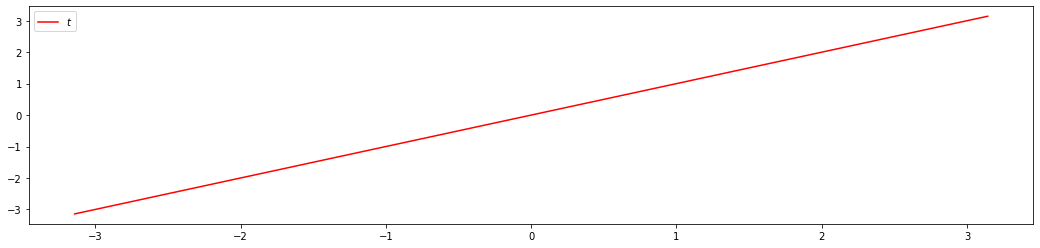

In [38]:
N = 2**10 + 1 # 1025
L = np.pi 
t = np.linspace(-L, L, N)

w = np.copy(t) 
omega = np.copy(t) 

fig, ax = plt.subplots(1,1,figsize=(18,4))
o1 = ax.plot(t, t, 'r-',  label='$t$')
ax.legend()

## Ejercicio 1 - Trasnformada de Fourier y Representación Frecuencial.
Usando las propriedades de la Transformada de Fourier calcule la transformada de las siguiente señales. Grafique
la señal $x$ y el modulo de su transformada $|\hat{x}|$:

1. $x(t)=2\sin(\omega_0t)$

Usando la escritura de seno con exponenciales complejas, si $x(t) = 2\sin(\omega_0t) =  \dfrac{e^{i\omega_0t}-e^{-i\omega_0t}}{i}$, entonces

$$\hat x(\omega) = \frac{2 \pi}{i}  \left( \delta(\omega-\omega_0) - \delta(\omega+\omega_0)   \right),  $$

y luego

$$|\hat x(\omega)| = 2\pi \left( \delta(\omega-\omega_0) + \delta(\omega+\omega_0)  \right). $$
Con esto definimos ahora la Funcion1 como:

In [39]:
def Funcion1(w0):
    x = 2*np.sin(w0*t)
    n_w0 = int((L+w0) * N/(2*L))
    minus_n_w0 = int((L-w0) * N/(2*L))
    xhatmod = 2*np.pi*(signal.unit_impulse(N, n_w0) + signal.unit_impulse(N, minus_n_w0))

    fig, ax = plt.subplots(1, 2,figsize=(18,4))
    o1 = ax[0].plot(t, x, 'b-',  label='$x$')
    o2 = ax[1].plot(w, xhatmod, 'r-', label=' |$\hat{x}$|')
    ax[0].legend()
    ax[1].legend()

Calculamos para $\omega_0=1$

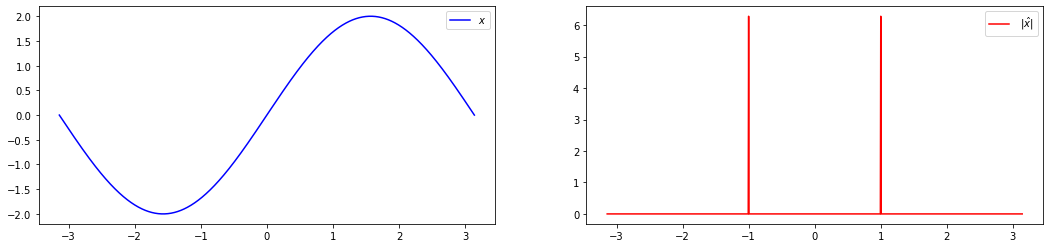

In [40]:
Funcion1(1)

Calculamos para $\omega_0=0.5$

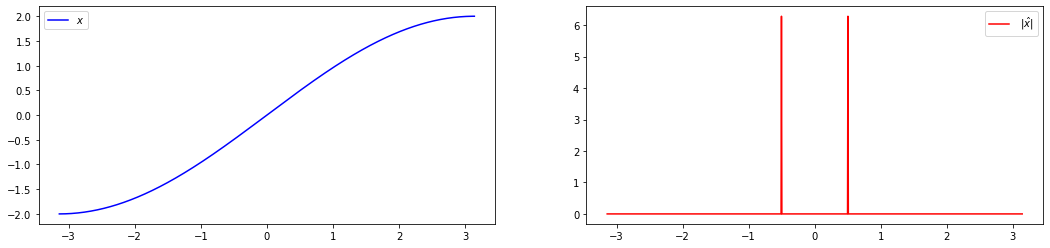

In [41]:
Funcion1(0.5)

Calculamos para $\omega_0=-1.89$

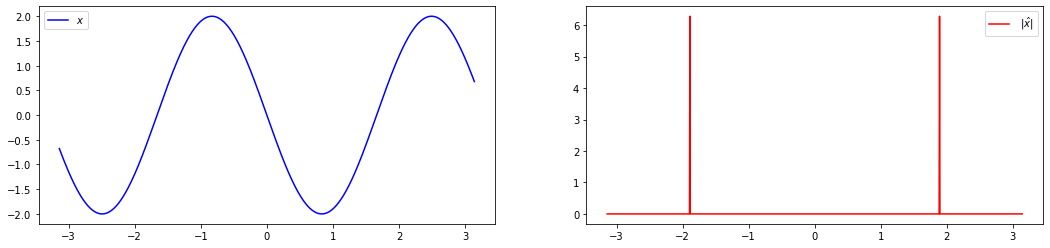

In [42]:
Funcion1(-1.89)

2. $x(t)=2\sin(2\omega_0t+2/3)$

Usando la escritura de seno con exponenciales complejas, si $x(t) = 2\sin(2\omega_0t+2/3) =  \dfrac{e^{2i\omega_0t+2i/3}-e^{-2i\omega_0t-2i/3}}{i}$, entonces

$$\hat x(\omega) = \frac{2 \pi}{i}  \left( e^{-2i/3}\delta(\omega-2\omega_0) - e^{2i/3}\delta(\omega+2\omega_0)   \right),  $$

y luego

$$|\hat x(\omega)| = 2\pi \left( \delta(\omega-2\omega_0) + \delta(\omega+2\omega_0)  \right). $$
Con esto definimos ahora la Funcion2 como:

In [43]:
def Funcion2(w0):
    x = 2*np.sin(2*w0*t+2/3)
    n_w0 = int((L+2*w0) * N/(2*L))
    minus_n_w0 = int((L-2*w0) * N/(2*L))
    xhatmod = 2*np.pi*(signal.unit_impulse(N, n_w0) + signal.unit_impulse(N, minus_n_w0))

    fig, ax = plt.subplots(1, 2,figsize=(18,4))
    o1 = ax[0].plot(t, x, 'b-',  label='$x$')
    o2 = ax[1].plot(w, xhatmod, 'r-', label=' |$\hat{x}$|')
    ax[0].legend()
    ax[1].legend()

Calculamos para $\omega_0=1$

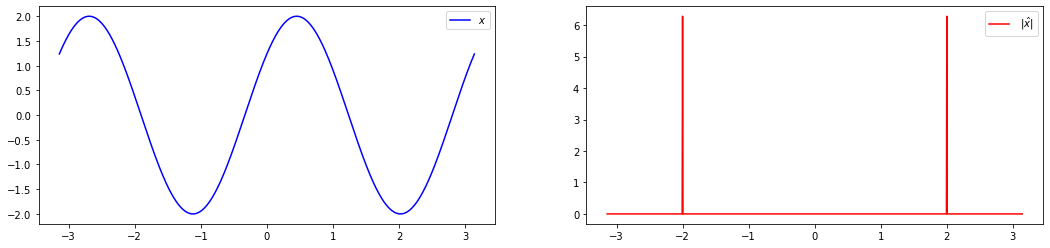

In [44]:
Funcion2(1)

Calculamos para $\omega_0=-1.3$

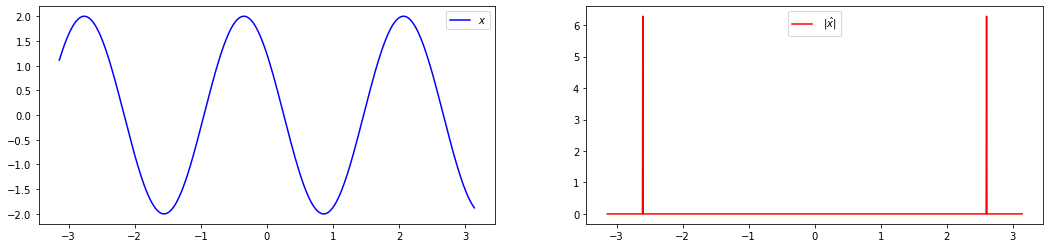

In [45]:
Funcion2(-1.3)

Calculamos para $\omega_0=-0.5$

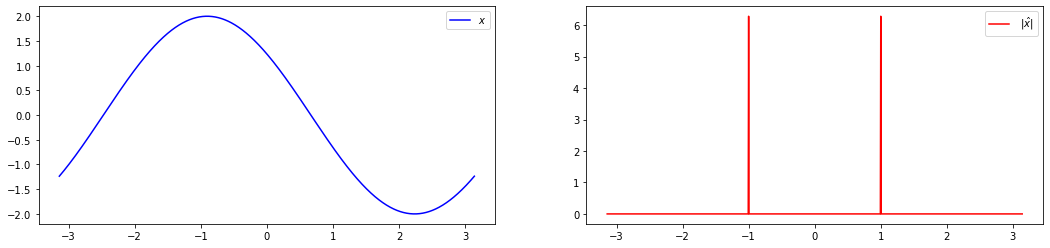

In [46]:
Funcion2(-0.5)

3. $x(t)=2\cos(\omega_0t)+\sin(\omega_0t)$

Usando la escritura de seno y el coseno con exponenciales complejas, si $x(t) = 2\cos(\omega_0t)+\sin(\omega_0t) = \left(1+\dfrac{i}{2}\right)e^{-it\omega_0}+\left(1-\dfrac{i}{2}\right)e^{it\omega_0}  $, entonces

$$\hat x(\omega) = 2 \pi\left((2 + i)  \delta(\omega - \omega_o) + (2 - i)  \delta(\omega_0 + \omega) \right), $$

y luego

$$|\hat x(\omega)| = 2 \pi\sqrt{5}\left(  \delta(\omega - \omega_o) +   \delta(\omega_0 + \omega) \right). $$
Con esto definimos ahora la Funcion3 como:

In [47]:
def Funcion3(w0):
    x = 2*np.cos(w0*t)+np.sin(w0*t)
    n_w0 = int((L+w0) * N/(2*L))
    minus_n_w0 = int((L-w0) * N/(2*L))
    xhatmod = 2*np.pi*math.sqrt(5)*(signal.unit_impulse(N, n_w0) + signal.unit_impulse(N, minus_n_w0))

    fig, ax = plt.subplots(1, 2,figsize=(18,4))
    o1 = ax[0].plot(t, x, 'b-',  label='$x$')
    o2 = ax[1].plot(w, xhatmod, 'r-', label=' |$\hat{x}$|')
    ax[0].legend()
    ax[1].legend()

Calculamos para $\omega_0=1$

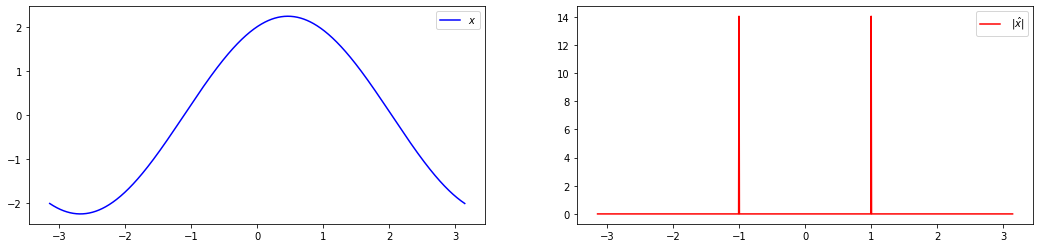

In [48]:
Funcion3(1)

Calculamos para $\omega_0=-0.5$

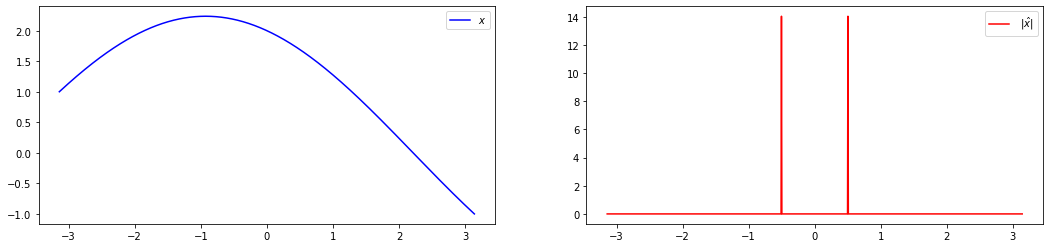

In [49]:
Funcion3(-0.5)

Calculamos para $\omega_0=1.5$

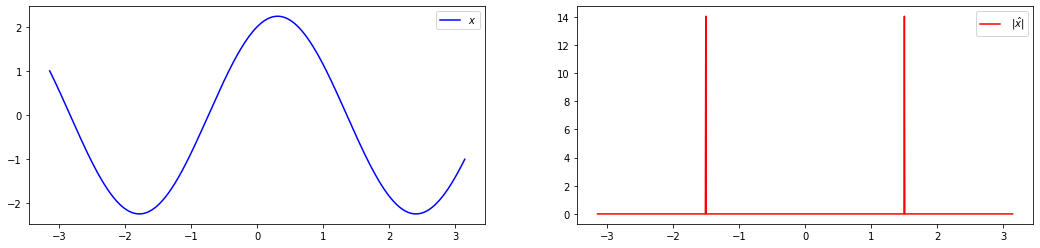

In [50]:
Funcion3(1.5)

3. $x(t)=1$

De donde la transformada da:

$$\hat x(\omega) = 2 \pi\delta(\omega), $$

y luego

$$|\hat x(\omega)| = 2 \pi\delta(\omega). $$
Con esto definimos gráficamos:

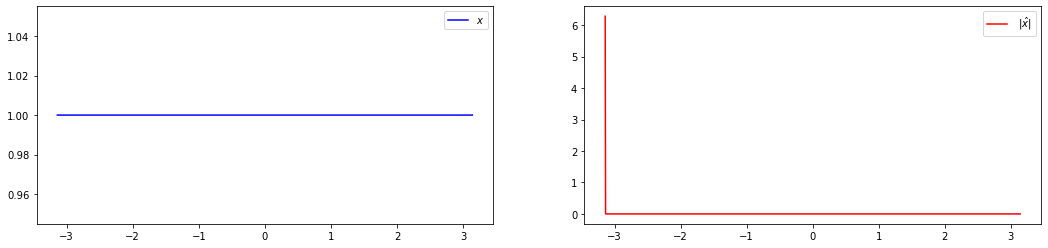

In [51]:
x = np.linspace(-L, L, N)-np.linspace(-L, L, N)+1
xhatmod = 2*np.pi*(signal.unit_impulse(N, 0))

fig, ax = plt.subplots(1, 2,figsize=(18,4))
o1 = ax[0].plot(t, x, 'b-',  label='$x$')
o2 = ax[1].plot(w, xhatmod, 'r-', label=' |$\hat{x}$|')
ax[0].legend()
ax[1].legend()

## Ejercicio 2 - Cálculo de la Transformada de Fourier.

Para las siguientes señales, grafique la señal, calcule la transformada de Fourier de las siguiente señales y grafique
su modulo. Cuando sea posible intente no calcular directamente la transformada.


1. $x(t) = e^{-at}\gamma(t)$, con $a>0$

Para la cual calculamos la Transformada de Fourier y queda:

\begin{eqnarray}
  \hat x(\omega) &=& \int_0^\infty e^{-at} e^{-i \omega t} dt,  \\
                 &=& \int_0^\infty e^{-(a +i \omega) t} dt, \\
                 &=& \left. \frac{e^{-(a +i \omega) t}}{-(a +i \omega)} \right|_0^\infty, \\
                 &=&  \frac{1}{(a +i \omega)}.
\end{eqnarray}  
Ahora procedemos a graficar la señal y los módulos.

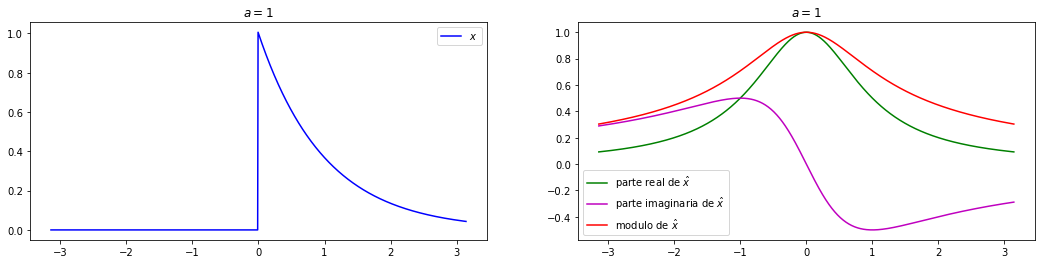

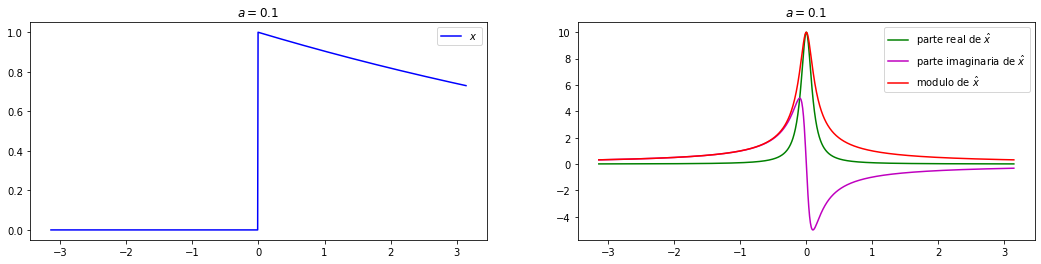

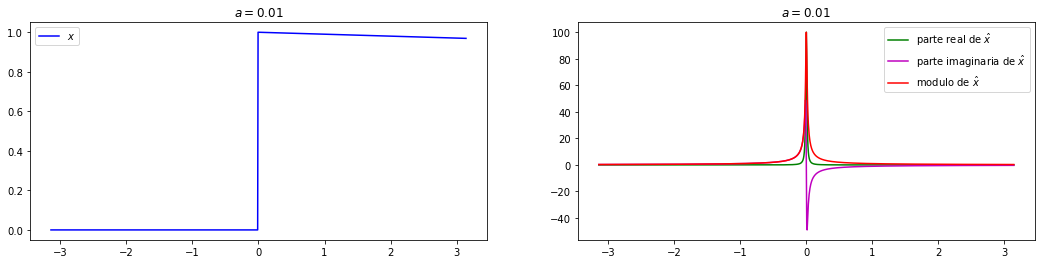

In [52]:
for a in [1, .1, .01]:
    
    x = np.exp(-a*t) 
    x[:int(N/2)-1] = 0
    xhat = 1/(a+1j*omega)

    fig, ax = plt.subplots(1,2,figsize=(18,4))
    o1 = ax[0].plot(t, x, 'b-', label='$x$')
    o2 = ax[1].plot(w, np.real(xhat), 'g-', label='parte real de $\hat{x}$')
    o2 = ax[1].plot(w, np.imag(xhat), 'm-', label='parte imaginaria de $\hat{x}$')
    o2 = ax[1].plot(w, np.abs(xhat), 'r-', label='modulo de $\hat{x}$')
    ax[0].legend()
    ax[1].legend()
    ax[0].set_title(f'$a = {a}$')
    ax[1].set_title(f'$a = {a}$')

2. $x(t) = e^{-a|t|}$ con $a>0$

Para la cual calculamos la Transformada de Fourier y queda:

\begin{eqnarray}
  \hat x(\omega) &=& \int_{-\infty}^\infty e^{-a|t|} e^{-i \omega t} dt,  \\
                 &=& \int_{-\infty}^0 e^{at} e^{-i \omega t} dt + \int_{0}^\infty e^{-at} e^{-i \omega t} dt,\\
                 &=& \int_{-\infty}^0 e^{(a-i\omega)t}dt + \int_0^\infty e^{(-a-i \omega)t} dt, \\
                 &=& \left. \dfrac{e^{(a-i\omega)t}}{(a-i\omega)}\right|_{-\infty}^0 + \left. \dfrac{e^{(-a-i\omega)t}}{(-a-i\omega)}\right|_0^\infty, \\
                 &=& \dfrac{1}{(a-i\omega)}+\dfrac{1}{(a+i\omega)}, \\
                 &=& \dfrac{2a}{a^2+\omega^2}.
\end{eqnarray}  
Ahora procedemos a graficar la señal y los módulos.

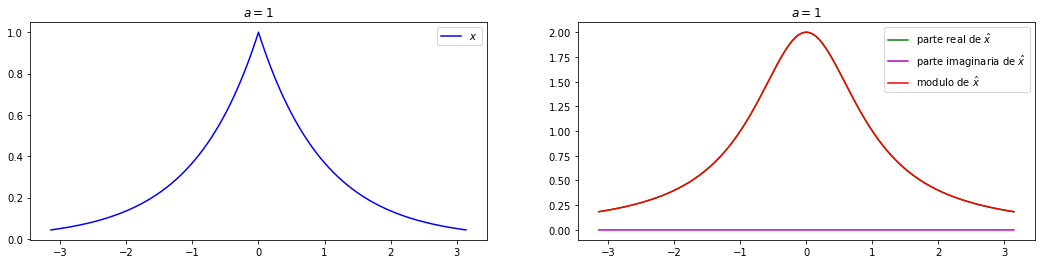

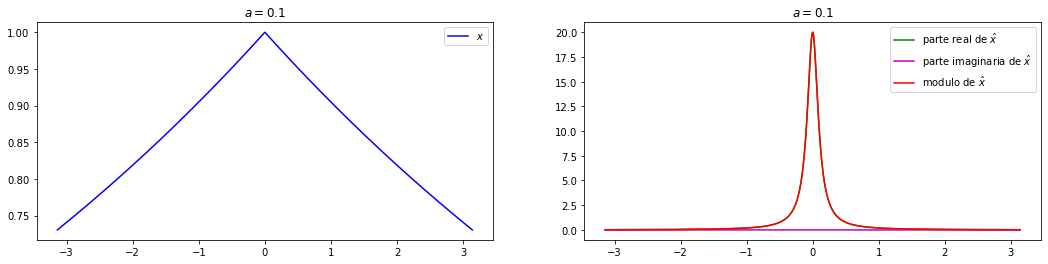

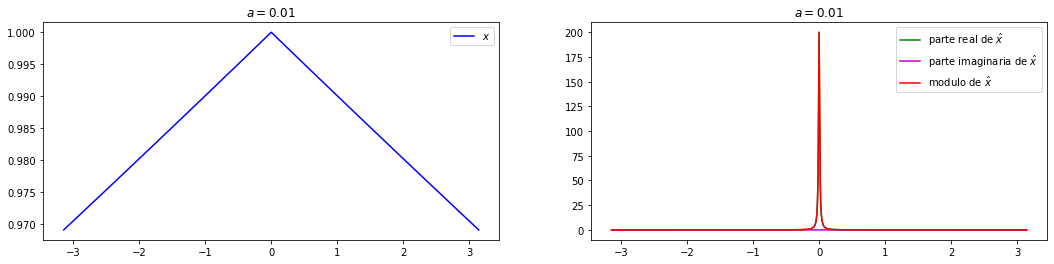

In [53]:
for a in [1, .1, .01]:
    
    x = np.exp(-a*np.abs(t))  
    xhat = 2*a/(np.power(a,2)+np.power(omega,2))

    
    fig, ax = plt.subplots(1,2,figsize=(18,4))
    o1 = ax[0].plot(t, x, 'b-', label='$x$')
    o2 = ax[1].plot(w, np.real(xhat), 'g-', label='parte real de $\hat{x}$')
    o2 = ax[1].plot(w, np.imag(xhat), 'm-', label='parte imaginaria de $\hat{x}$')
    o2 = ax[1].plot(w, np.abs(xhat), 'r-', label='modulo de $\hat{x}$')
    ax[0].legend()
    ax[1].legend()
    ax[0].set_title(f'$a = {a}$')
    ax[1].set_title(f'$a = {a}$')

3. $x(t) = \dfrac{1}{1+t^2}$

Para la cual notaremos que de 2. tomando $a=1$, dividiendo por 2 y usando la transformada inversa,
$$
\dfrac{e^{-|t|}}{2}=\int_{-\infty}^{\infty} \dfrac{e^{-i\omega t}}{1+\omega^2}d\omega,
$$
es por esto que 
$$
\hat{x}(\omega)=\dfrac{e^{-|\omega|}}{2}.
$$
Ahora procedemos a graficar la señal y los módulos.

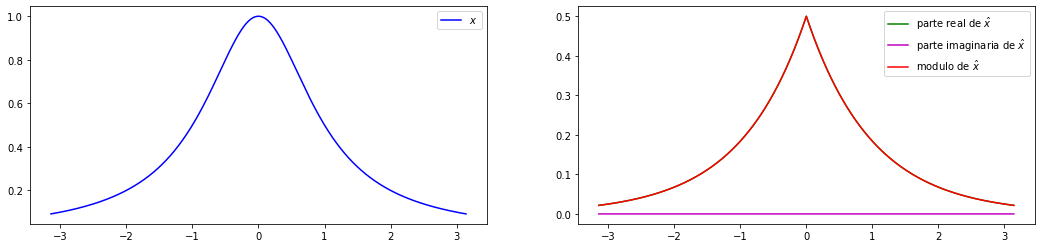

In [54]:
x = 1/(1+np.power(t,2)) 
xhat = np.exp(-np.abs(omega))/2
fig, ax = plt.subplots(1,2,figsize=(18,4))
o1 = ax[0].plot(t, x, 'b-', label='$x$')
o2 = ax[1].plot(w, np.real(xhat), 'g-', label='parte real de $\hat{x}$')
o2 = ax[1].plot(w, np.imag(xhat), 'm-', label='parte imaginaria de $\hat{x}$')
o2 = ax[1].plot(w, np.abs(xhat), 'r-', label='modulo de $\hat{x}$')
ax[0].legend()
ax[1].legend()

4. $x(t) = \dfrac{1}{2-2t+t^2}$

Para la cual notaremos que de 3.
$$
\dfrac{2}{1+t^2} \xrightarrow{\mathscr{F}} e^{-|\omega|},
$$
y además sabemos que,
$$
f(x-a) \xrightarrow{\mathscr{F}} e^{-i\omega a} \mathscr{F}(\omega),
$$
por lo que
$$
\mathscr{F}\left( \dfrac{1}{2-2t+t^2} \right)=\mathscr{F}\left( \dfrac{1}{(t-1)^2+1} \right)=e^{-i\omega}\mathscr{F}\left( \dfrac{1}{t^2+1} \right)=e^{-i \omega} e^{-|\omega|}.
$$
Ahora procedemos a graficar la señal y los módulos.

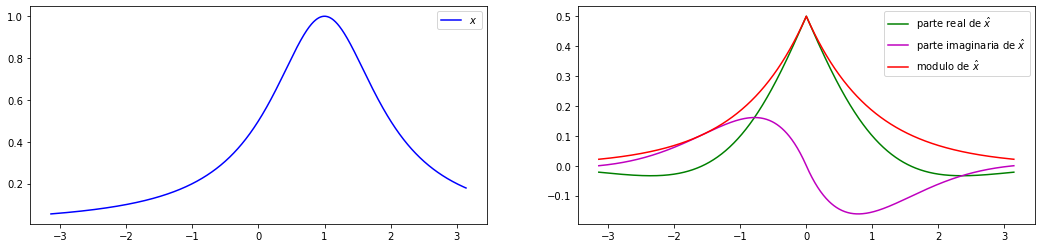

In [55]:
x = 1/(2-2*t+np.power(t,2)) 
xhat = np.exp(-1j*omega-np.abs(omega))/2
fig, ax = plt.subplots(1,2,figsize=(18,4))
o1 = ax[0].plot(t, x, 'b-', label='$x$')
o2 = ax[1].plot(w, np.real(xhat), 'g-', label='parte real de $\hat{x}$')
o2 = ax[1].plot(w, np.imag(xhat), 'm-', label='parte imaginaria de $\hat{x}$')
o2 = ax[1].plot(w, np.abs(xhat), 'r-', label='modulo de $\hat{x}$')
ax[0].legend()
ax[1].legend()

5. $x(t) = \dfrac{1}{(1+t^2)^2}$

Para la cual notaremos que de 2. tomando $a=1$
$$
 \dfrac{e^{-|\omega|}}{2}\xrightarrow{\mathscr{F}} \dfrac{1}{1+t^2},
$$
y además sabemos que,
$$
\widehat{(f*g)}(\omega)=\hat{f}(\omega)\hat{g}(\omega),
$$
de donde si hacemos $g=f$
$$
\widehat{(f*f)}(\omega)=\hat{f}(\omega)\hat{f}(\omega)
$$
por lo que
$$
\dfrac{e^{-|\omega|}}{2}*\dfrac{e^{-|\omega|}}{2} \xrightarrow{\mathscr{F}} \dfrac{1}{(1+t^2)^2},
$$
pero notamos que 
$$
\dfrac{e^{-|\omega|}}{2}*\dfrac{e^{-|\omega|}}{2}=\dfrac{1}{4}\int_{-\infty}^\infty e^{-|y|}e^{-|\omega-y|}d\omega
$$
de donde la integral de la derecha depende de $\omega$, pues si $\omega >0$, la integral queda
\begin{eqnarray}
\dfrac{e^{-|\omega|}}{2}*\dfrac{e^{-|\omega|}}{2} &=&\dfrac{1}{4}\left( \int_{-\infty}^0 e^y e^{-(\omega-y)}dy+\int_0^\omega e^{-y}e^{-(\omega-y)}dy+\int_\omega^\infty e^{-y}e^{\omega-y}dy \right), \\
&=&\dfrac{1}{4}\left( \int_{-\infty}^0  e^{-\omega+2y}dy+\int_0^\omega e^{-\omega}dy+\int_\omega^\infty e^{\omega-2y}dy \right), \\
&=&\dfrac{1}{4}\left( \left.\dfrac{e^{-\omega+2y}}{2}\right|_{-\infty}^0 + e^{-\omega} \omega - \left. \dfrac{e^{\omega-2y}}{2} \right|_\omega^\infty \right), \\
&=&\dfrac{e^{-\omega}+ e^{-\omega}\omega}{4}, \\
\end{eqnarray}
por otro lado si $\omega < 0$, tenemos
\begin{eqnarray}
\dfrac{e^{-|\omega|}}{2}*\dfrac{e^{-|\omega|}}{2} &=&\dfrac{1}{4}\left( \int_{-\infty}^\omega e^y e^{-(\omega-y)}dy+\int_\omega^0 e^{y}e^{\omega-y}dy+\int_0^\infty e^{-y}e^{\omega-y}dy \right), \\
&=&\dfrac{1}{4}\left( \int_{-\infty}^\omega  e^{-\omega+2y}dy+\int_\omega^0 e^{\omega}dy+\int_0^\infty e^{\omega-2y}dy \right), \\
&=&\dfrac{1}{4}\left( \left.\dfrac{e^{-\omega+2y}}{2}\right|_{-\infty}^\omega - e^{\omega} \omega - \left. \dfrac{e^{\omega-2y}}{2} \right|_0^\infty \right), \\
&=&\dfrac{e^{\omega}-e^{\omega}\omega}{4}, \\
\end{eqnarray}
por lo tanto obtenemos que
$$
\dfrac{e^{-|\omega|}}{2}*\dfrac{e^{-|\omega|}}{2}=\dfrac{e^{-|\omega|}(|\omega|+1)}{4}.
$$
Y luego de la trasnformada inversa
$$
\dfrac{1}{(1+t^2)^2}=\int_{-\infty}^{\infty} \dfrac{e^{-|\omega|}(|\omega|+1)e^{-i\omega t}}{4}d\omega,
$$
por lo tanto, tenemos que 
$$
\hat{x}(\omega)=\dfrac{e^{-|\omega|}(|\omega|+1)}{4}.
$$
Ahora procedemos a graficar la señal y los módulos.

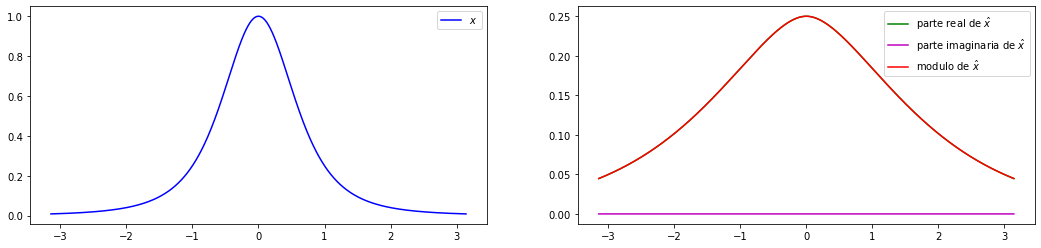

In [62]:
aux=1+np.power(t,2)
x = 1/(np.power(aux,2))
xhat = (np.exp(-np.abs(omega)))*(np.abs(omega)+1)/4
fig, ax = plt.subplots(1,2,figsize=(18,4))
o1 = ax[0].plot(t, x, 'b-', label='$x$')
o2 = ax[1].plot(w, np.real(xhat), 'g-', label='parte real de $\hat{x}$')
o2 = ax[1].plot(w, np.imag(xhat), 'm-', label='parte imaginaria de $\hat{x}$')
o2 = ax[1].plot(w, np.abs(xhat), 'r-', label='modulo de $\hat{x}$')
ax[0].legend()
ax[1].legend()